# Venn region subtraction & intersection geometry :: Visual examination

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import _region, _math
import warnings
warnings.simplefilter("error") # Have warnings raise exceptions in this test


def show_region(ax, r, c='r', xlim=(-2,2), ylim=(-2,2)):
    ax.set_aspect('equal')
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    p = r.make_patch()
    if p is not None:
        p.set_color(c)
        p.set_ec('none')
        p.set_alpha(0.5)
        ax.add_patch(p)


def test_region_subtraction_intersection(region, center, radius, xlim=(-2, 2), ylim=(-2, 2)):
    fig, axs = plt.subplots(1, 2)

    vcr = _region.VennCircleRegion(center, radius)
    show_region(axs[0], region, 'r')
    show_region(axs[0], vcr, 'b', xlim, ylim)

    s, i = region.subtract_and_intersect_circle(center, radius)
    s.verify()
    i.verify()
    assert abs(s.size() + i.size() - region.size()) < _math.NUMERIC_TOLERANCE
    show_region(axs[1], s, 'r')
    show_region(axs[1], i, 'm', xlim, ylim)


def test_two_circles(c1, r1, c2, r2, xlim, ylim=(-2, 2)):
    test_region_subtraction_intersection(_region.VennCircleRegion(c1, r1), c2, r2, xlim)

r1, r2 = _region.VennCircleRegion((0, 0), 1).subtract_and_intersect_circle((1, 0), 1)
r3, r4 = _region.VennCircleRegion((0, 0), 1).subtract_and_intersect_circle((0.6,0), 0.45)

## Circular regions

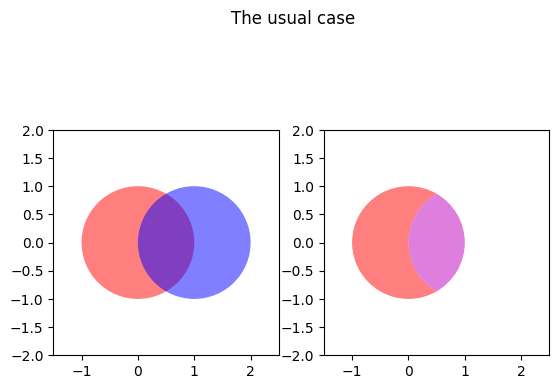

In [4]:
test_two_circles((0, 0), 1, (1, 0), 1, (-1.5, 2.5))
plt.gcf().suptitle("The usual case");

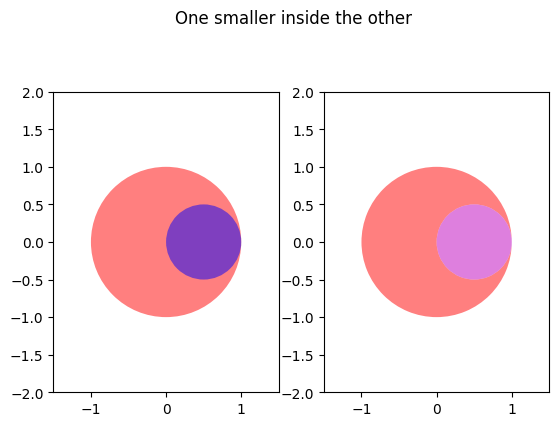

In [5]:
test_two_circles((0, 0), 1, (0.5, 0), 0.5, (-1.5, 1.5))
plt.gcf().suptitle("One smaller inside the other");

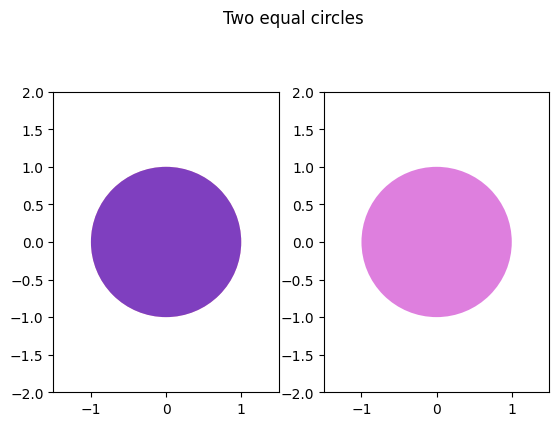

In [6]:
test_two_circles((0, 0), 1, (0, 0), 1, (-1.5, 1.5))
plt.gcf().suptitle("Two equal circles");

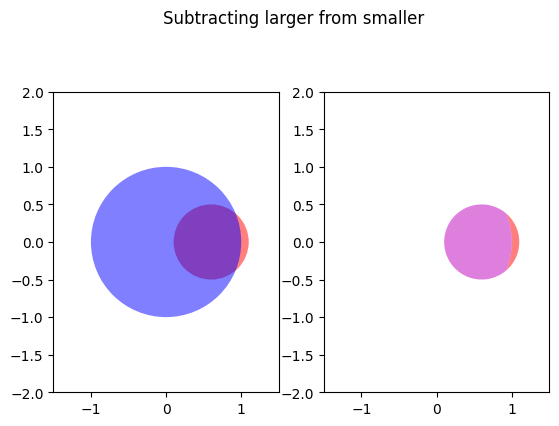

In [7]:
test_two_circles((0.6, 0), 0.5, (0, 0), 1, (-1.5, 1.5))
plt.gcf().suptitle("Subtracting larger from smaller");

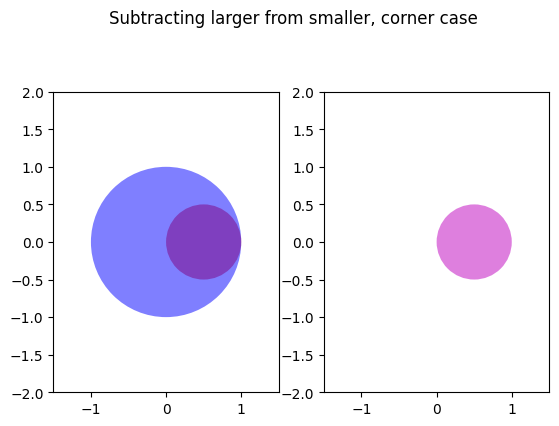

In [8]:
test_two_circles((0.5, 0), 0.5, (0, 0), 1, (-1.5, 1.5))
plt.suptitle("Subtracting larger from smaller, corner case");

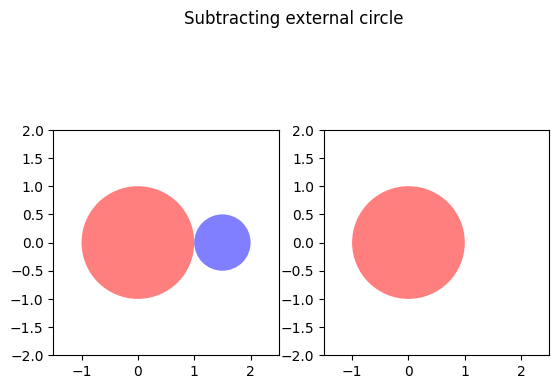

In [9]:
test_two_circles((0, 0), 1, (1.5, 0), 0.5, (-1.5, 2.5))
plt.gcf().suptitle("Subtracting external circle");

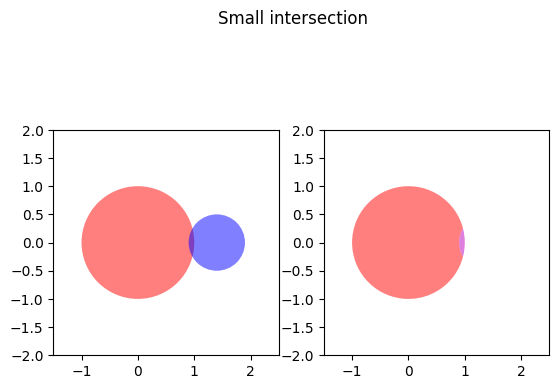

In [10]:
test_two_circles((0, 0), 1, (1.4, 0), 0.5, (-1.5, 2.5))
plt.gcf().suptitle("Small intersection");

## 2-arc-gon regions

The following examples illustrates all the special cases covered in the 2-arc-gon/circle subtraction-intersection routine.

### I. No intersection points

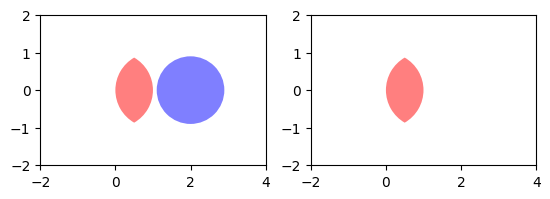

In [11]:
test_region_subtraction_intersection(r2, (2, 0), 0.9, (-2, 4))

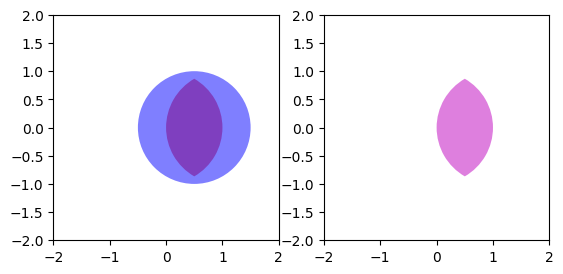

In [12]:
test_region_subtraction_intersection(r2, (0.5, 0), 1.0)

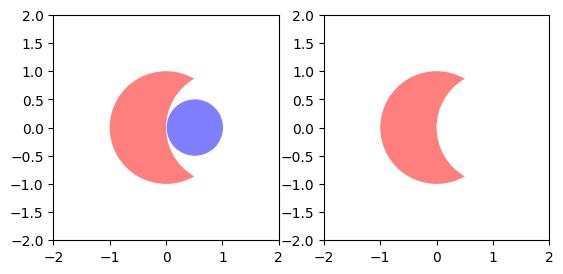

In [13]:
test_region_subtraction_intersection(r1, (0.51, 0), 0.5)

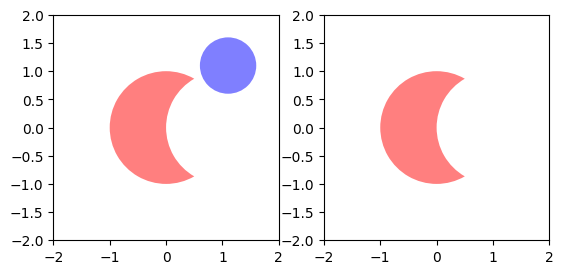

In [14]:
test_region_subtraction_intersection(r1, (1.1, 1.1), 0.5)

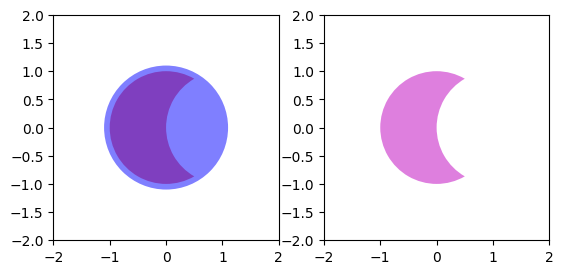

In [15]:
test_region_subtraction_intersection(r1, (0, 0), 1.1)

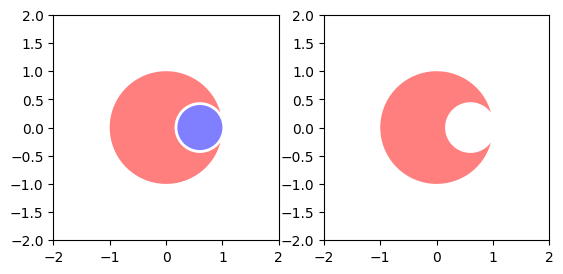

In [16]:
test_region_subtraction_intersection(r3, (0.6, 0), 0.4)

### II. Four intersection points

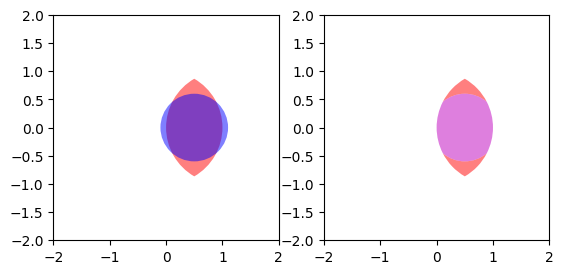

In [17]:
test_region_subtraction_intersection(r2, (0.5, 0), 0.6)

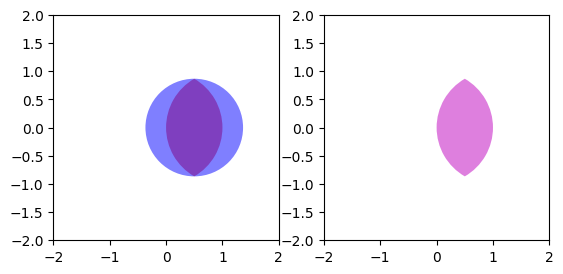

In [18]:
test_region_subtraction_intersection(r2, (0.5, 0), np.sin(np.pi/3))

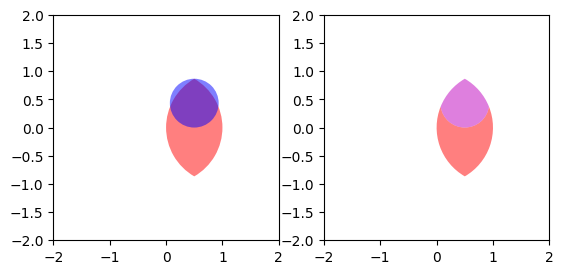

In [19]:
test_region_subtraction_intersection(r2, (0.5, np.sin(np.pi/3)/2), np.sin(np.pi/3)/2)

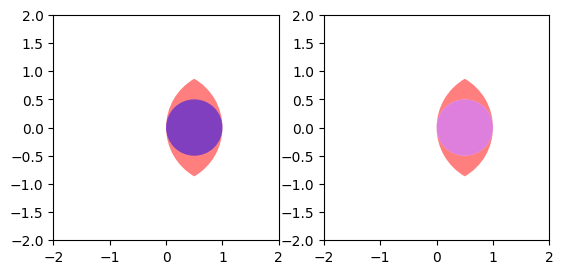

In [20]:
test_region_subtraction_intersection(r2, (0.5, 0), 0.5, (-2, 2))

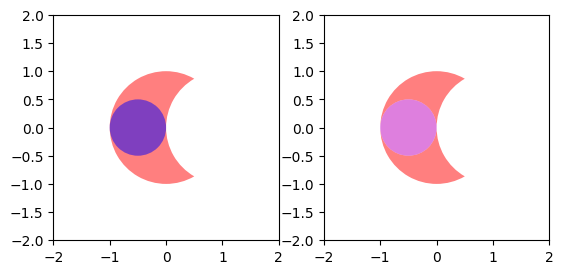

In [21]:
test_region_subtraction_intersection(r1, (-0.5, 0), 0.5, (-2, 2))

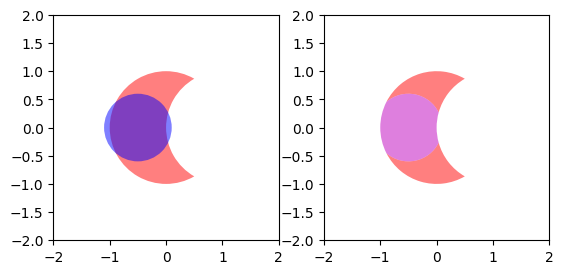

In [22]:
test_region_subtraction_intersection(r1, (-0.5, 0), 0.6, (-2, 2))

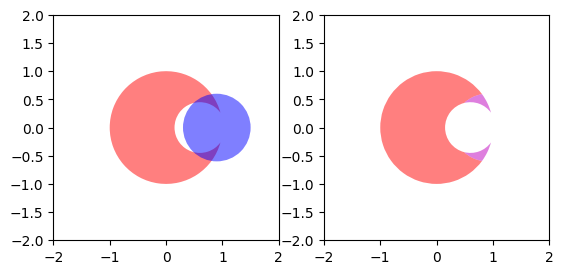

In [23]:
test_region_subtraction_intersection(r3, (0.9, 0), 0.6, (-2, 2))

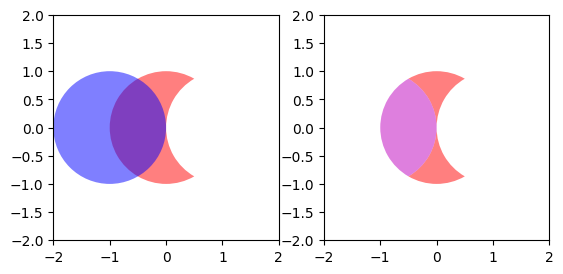

In [24]:
test_region_subtraction_intersection(r1, (-1, 0), 1, (-2, 2))

### III. Two intersection points

#### IIIa: 2+0

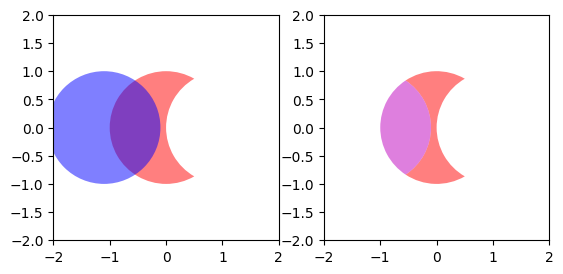

In [25]:
test_region_subtraction_intersection(r1, (-1.1, 0), 1)

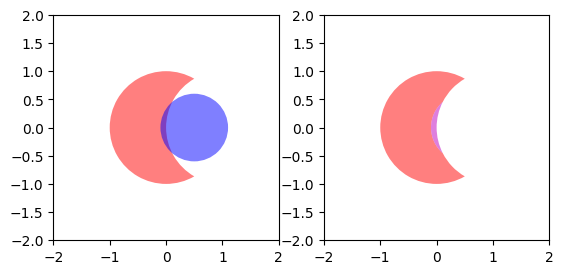

In [26]:
test_region_subtraction_intersection(r1, (0.5, 0), 0.6)

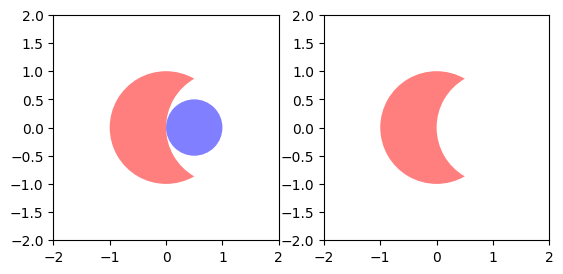

In [27]:
test_region_subtraction_intersection(r1, (0.5, 0), 0.5)

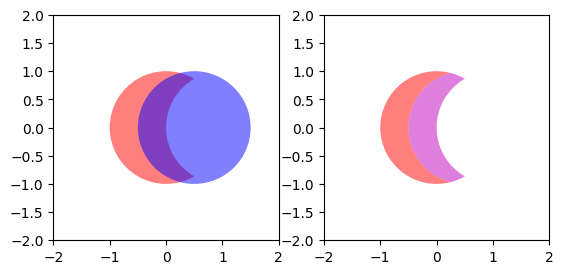

In [28]:
test_region_subtraction_intersection(r1, (0.5, 0), 1)

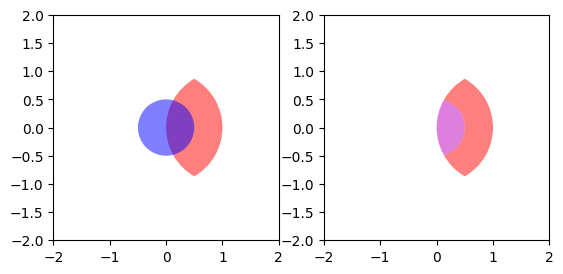

In [29]:
test_region_subtraction_intersection(r2, (0, 0), 0.5)

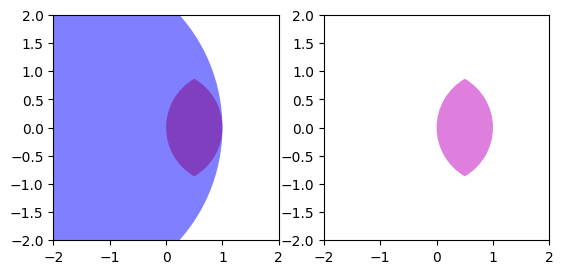

In [30]:
test_region_subtraction_intersection(r2, (-2, 0), 3)

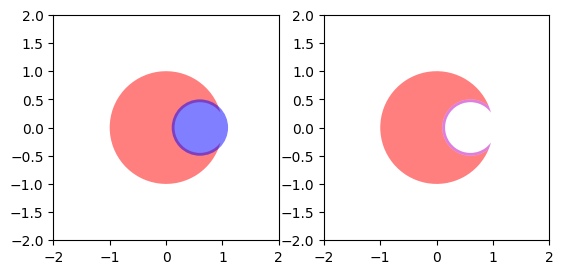

In [31]:
test_region_subtraction_intersection(r3, (0.6, 0), 0.5)

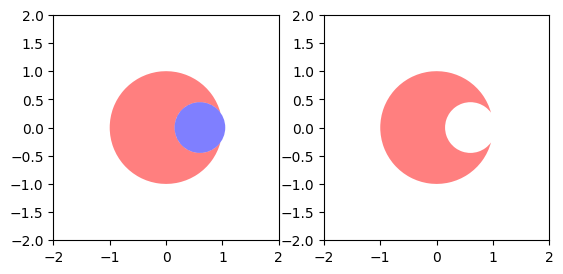

In [32]:
test_region_subtraction_intersection(r3, (0.6, 0), 0.45)

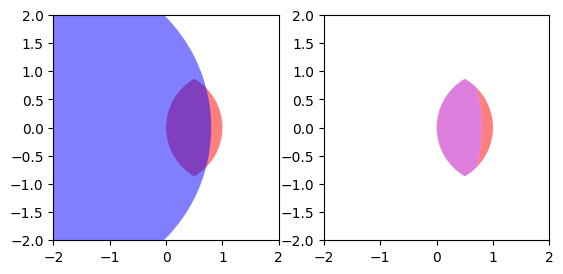

In [33]:
test_region_subtraction_intersection(r2, (-2, 0), 2.8)

#### IIIb: 1+1

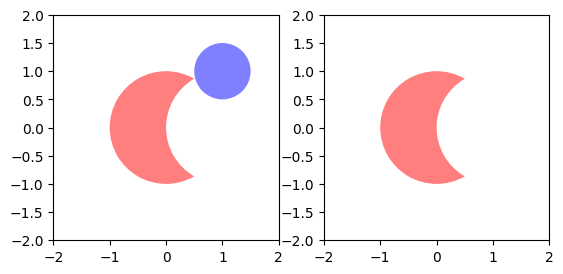

In [34]:
test_region_subtraction_intersection(r1, (1, 1), 0.5)

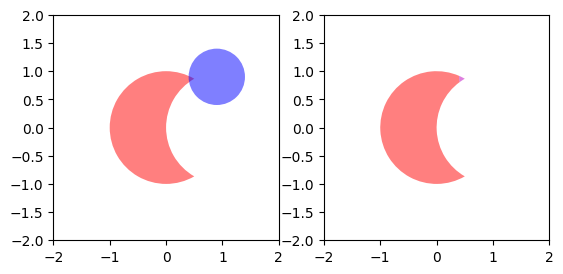

In [35]:
test_region_subtraction_intersection(r1, (0.9, 0.9), 0.5)

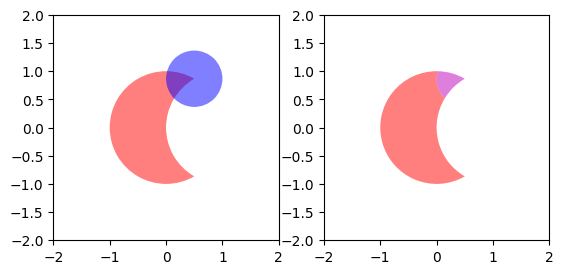

In [36]:
test_region_subtraction_intersection(r1, (0.5, np.sin(np.pi/3)), 0.5)

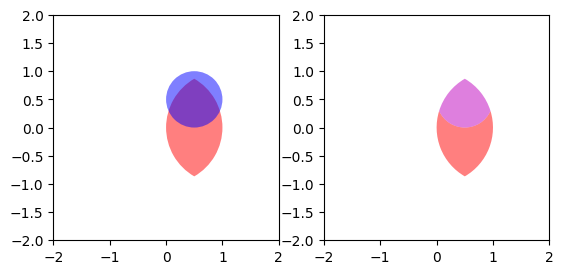

In [37]:
test_region_subtraction_intersection(r2, (0.5, 0.5), 0.5)

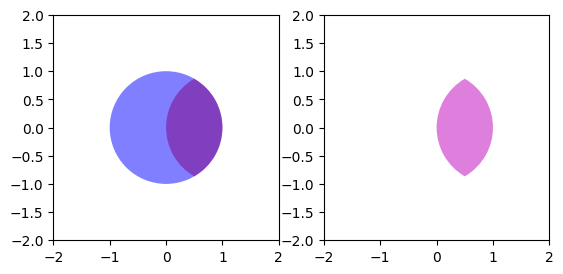

In [38]:
test_region_subtraction_intersection(r2, (0, 0), 1.0)

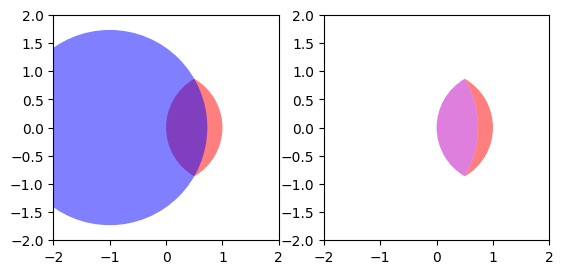

In [39]:
r = np.linalg.norm(np.array([-1, 0]) - np.array([0.5, np.sin(np.pi/3)]))
test_region_subtraction_intersection(r2, (-1, 0), r)

## Various corner cases

In [40]:
centers = np.array([[-0.0823120, 0.02842443], [ 0.02131832, 0.02842443], [ 0.05033492, -0.07106106]])
radii = np.array([ 0.46065887, 0.56418958, 0.46065887])
A = _region.VennCircleRegion(centers[0], radii[0])
B = _region.VennCircleRegion(centers[1], radii[1])
C = _region.VennCircleRegion(centers[2], radii[2])
Ab, AB = A.subtract_and_intersect_circle(B.center, B.radius)
ABc, ABC = AB.subtract_and_intersect_circle(C.center, C.radius)
Abc, AbC = Ab.subtract_and_intersect_circle(C.center, C.radius)
aB, _ = B.subtract_and_intersect_circle(A.center, A.radius)
aBc, aBC = aB.subtract_and_intersect_circle(C.center, C.radius)
aC, _ = C.subtract_and_intersect_circle(A.center, A.radius)
abC, _ = aC.subtract_and_intersect_circle(B.center, B.radius) 
rs = (Abc, aBc, ABc, abC, AbC, aBC, ABC)

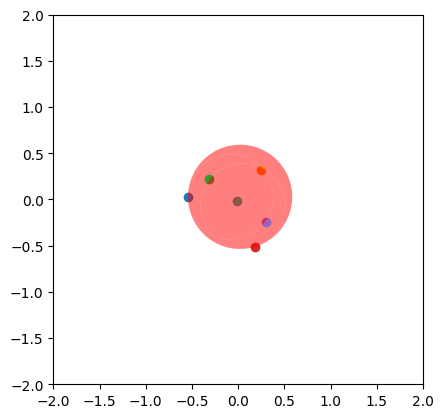

In [41]:
fig, ax = plt.subplots()
for r in rs:
    show_region(ax, r)
    lpos = r.label_position()
    if lpos is not None:
        ax.scatter(lpos[0], lpos[1])